In [123]:
import requests
import numpy as np


def download_data(url,filename):    #download file as data
    result = requests.get(url)
    result.raise_for_status()
    with open(filename,'wb') as FILE:
        for chunk in result.iter_content(102400):
            FILE.write(chunk)
            
url01 = 'https://www.csie.ntu.edu.tw/~htlin/mooc/datasets/mltech/hw3_dectree_train.dat'
url02 = 'https://www.csie.ntu.edu.tw/~htlin/mooc/datasets/mltech/hw3_dectree_test.dat'
download_data(url01, 'hw3_dectree_train.txt')
download_data(url02, 'hw3_dectree_test.txt')
    
    
def readout(filename):
    with open(filename,'r') as FILE:
        n, Dx, Dy = 0 ,[], []
        
        for chunk in FILE:
            X= chunk.split()   #split the line into a list of string
            X= [ float(X[j]) for j in range(len(X)) ]  #convert the string to numbers   
#            X.insert(0,1)                #insert a constant as bias or as threshold
            Dx.append(X[0:len(X)-1])     #gather all data ## index len(X)-1 will not be included here
            Dy.append(X[len(X)-1])       #index len(X)-1 only
            n=n+1
        x = np.array(Dx)  #change list X into array x
        y = np.array(Dy)
    print(x,n)            
    return x,y,n        


def eout(w,testx,testy):
    err = []
    yhat = [np.dot(w,testx[i]) for i in range(testn)]

    for a,b in zip(yhat,testy):
        if a*b<=0:
            err.append(1)
        else:
            err.append(0)
    eout = sum(err) /testn
    return eout


trainx, trainy, trainn = readout('hw3_dectree_train.txt')
testx, testy, testn    = readout('hw3_dectree_test.txt') 

[[0.757222  0.633831 ]
 [0.847382  0.281581 ]
 [0.24931   0.618635 ]
 [0.538526  0.144259 ]
 [0.474435  0.414558 ]
 [0.374151  0.0120482]
 [0.847185  0.217572 ]
 [0.983368  0.250496 ]
 [0.645141  0.485816 ]
 [0.172211  0.254331 ]
 [0.116866  0.378804 ]
 [0.55097   0.760426 ]
 [0.312109  0.442938 ]
 [0.304777  0.0529649]
 [0.572727  0.370527 ]
 [0.171491  0.50076  ]
 [0.644567  0.834055 ]
 [0.0529041 0.338461 ]
 [0.0323543 0.830701 ]
 [0.272193  0.587396 ]
 [0.123521  0.0516625]
 [0.905544  0.247013 ]
 [0.854276  0.559648 ]
 [0.375914  0.505747 ]
 [0.160755  0.238718 ]
 [0.45893   0.227062 ]
 [0.395407  0.791184 ]
 [0.742325  0.586444 ]
 [0.43615   0.136922 ]
 [0.954217  0.680325 ]
 [0.916386  0.381431 ]
 [0.953844  0.439266 ]
 [0.328701  0.721918 ]
 [0.275732  0.43115  ]
 [0.892366  0.0136661]
 [0.249529  0.0709084]
 [0.124333  0.611515 ]
 [0.54449   0.423701 ]
 [0.86019   0.93029  ]
 [0.432404  0.0901487]
 [0.204973  0.406648 ]
 [0.0748025 0.568699 ]
 [0.936407  0.106094 ]
 [0.572728 

In [205]:
#13 #14
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(trainx, trainy)
#15
1-model.score(testx, testy)

0.129

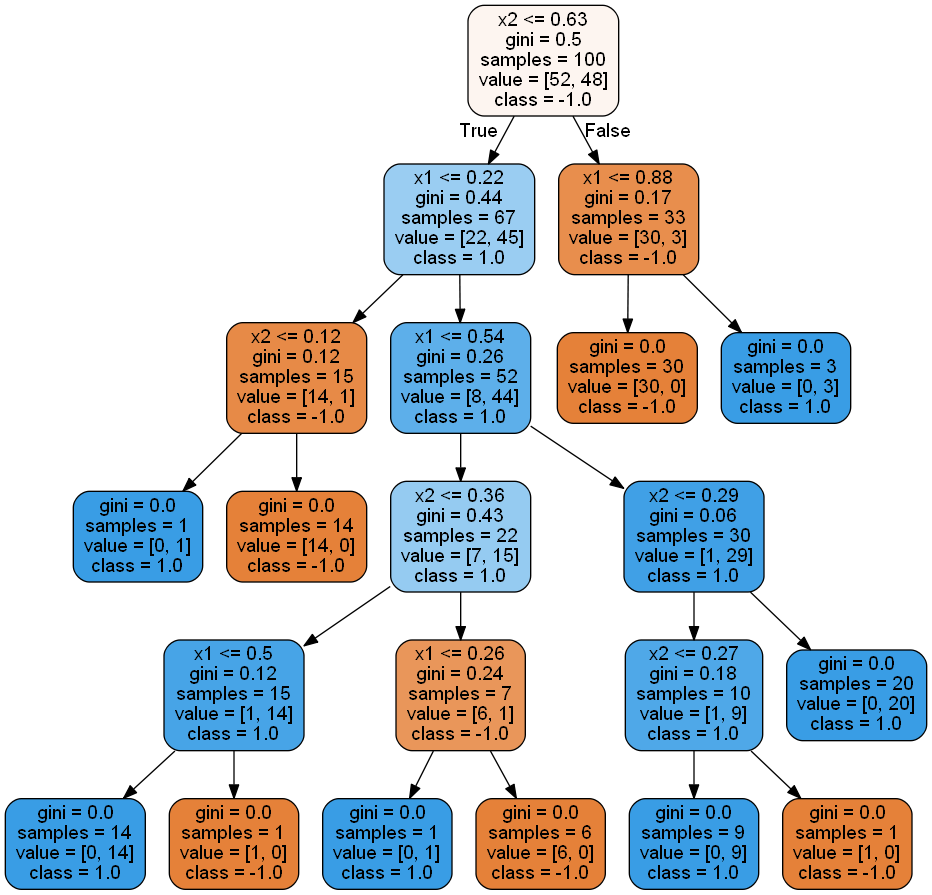

In [197]:
#13.
# Export as dot file
#out_file output出的檔案名稱
#rounded 將原本每個有角的點 改成以圓弧包住 並更換呈現字體
#proportion 如果為True 原本出現node裡面的values和samples都以ratio方式呈現
#precision為呈現的數值為float的小數點後幾位
#filled 將主要劃分classification的節點填色

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree_decision_classifier.dot', 
                feature_names = ['x1', 'x2'],
                class_names = list((str(c)) for c in model.classes_),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


from subprocess import call
import os
location = os.getcwd()
call(f'cd {location} && dot -Tpng tree_decision_classifier.dot -o tree_decision_classifier.png' ,shell=True)

#call(['dot', '-Tpng', 'tree_decision_classifier.dot', '-o', 'tree_decision_classifier.png', '-Gdpi=600'])
#dot -Tpng tree_decision_classifier.dot -o tree_decision_classifier.png


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_decision_classifier.png')

In [134]:
def bag(trainx, trainy,nprime):
    import random
    bagx, bagy = [], []
    
    for i in range(nprime):
        n = random.randint(0,nprime-1)
        bagx.append(trainx[n])
        bagy.append(trainy[n])
    bagx = np.array(bagx)
    bagy = np.array(bagy)

    return bagx, bagy
        

In [200]:
#16. Ein(g)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

t = 1
T = 300
nprime = trainn
Err = 0

while t<= 100:
    for i in range(T):
        bagx, bagy = bag(trainx,trainy,nprime)
        model = DecisionTreeClassifier()
        model.fit(bagx, bagy)
        Err = Err+1-model.score(trainx,trainy)
    t=t+1

Err/t/T

0.05145016501648057

In [187]:
#17.Ein(G_RF)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
t = 1
T = 300
Err = 0
nprime = trainn

while t<= 100:
    yhat = np.zeros(trainn,)
    for i in range(T):
        bagx, bagy = bag(trainx,trainy,nprime)
        model = DecisionTreeClassifier()
        model.fit(bagx, bagy)
        yhat = yhat+model.predict(trainx)
        score = np.sign(yhat)
    err = 1-accuracy_score(trainy, score)
    Err = Err + err
    t=t+1
Err = Err/t
print(Err)

0.0


In [190]:
#18. Eout(G_RF)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
t = 1
T = 300
Err = 0
nprime = trainn

while t<= 100:
    yhat = np.zeros(testn,)                 # change train to test here  
    for i in range(T):
        bagx, bagy = bag(trainx,trainy,nprime)
        model = DecisionTreeClassifier()
        model.fit(bagx, bagy)
        yhat = yhat+model.predict(testx)    # change train to test here  
        score = np.sign(yhat)
    err = 1-accuracy_score(testy, score)    # change train to test here  
    Err = Err + err
    t=t+1
Err = Err/t
print(Err)

0.07236633663366335


In [198]:
#19. prune Ein
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
t = 1
T = 300
Err = 0
nprime = trainn

while t<= 100:
    yhat = np.zeros(trainn,)                        
    for i in range(T):
        bagx, bagy = bag(trainx,trainy,nprime)
        model = DecisionTreeClassifier(max_depth=1)
        model.fit(bagx, bagy)
        yhat = yhat+model.predict(trainx)
        score = np.sign(yhat)
    err = 1-accuracy_score(trainy, score)
    Err = Err + err
    t=t+1
Err = Err/t
print(Err)

0.11227722772277215


In [199]:
#20. prune Eout
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
t = 1
T = 300
Err = 0
nprime = trainn

while t<= 100:
    yhat = np.zeros(testn,)               # change train to test here                
    for i in range(T):
        bagx, bagy = bag(trainx,trainy,nprime)
        model = DecisionTreeClassifier(max_depth=1)
        model.fit(bagx, bagy)
        yhat = yhat+model.predict(testx) # change train to test here 
        score = np.sign(yhat)
    err = 1-accuracy_score(testy, score) # change train to test here 
    Err = Err + err
    t=t+1
Err = Err/t
print(Err)

0.15174257425742577
